In [1]:
import pyemma.coordinates as coords
import mdtraj as md

In [2]:
trajfile = 'C:\\Users\\data\\Crystals.xtc'
topfile = 'C:\\Users\\data\\REFprot.pdb'

In [3]:
feat = coords.featurizer(topfile)
# just use all xyz-coordinates
feat.add_all()

In [4]:
feat.describe()[:10]

['ATOM:GLN 19 N 0 0 x',
 'ATOM:GLN 19 N 0 0 y',
 'ATOM:GLN 19 N 0 0 z',
 'ATOM:GLN 19 CA 1 0 x',
 'ATOM:GLN 19 CA 1 0 y',
 'ATOM:GLN 19 CA 1 0 z',
 'ATOM:GLN 19 C 2 0 x',
 'ATOM:GLN 19 C 2 0 y',
 'ATOM:GLN 19 C 2 0 z',
 'ATOM:GLN 19 O 3 0 x']

In [5]:
inp = coords.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

trajectory length =  158
number of dimension =  3243


In [6]:
lag=100
tica_obj = coords.tica(inp, lag=lag, dim=2, kinetic_map=True)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()[0]
print('Projected data shape = ', Y.shape)

Projected data shape =  (158, 2)


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'time (1000 ns)')

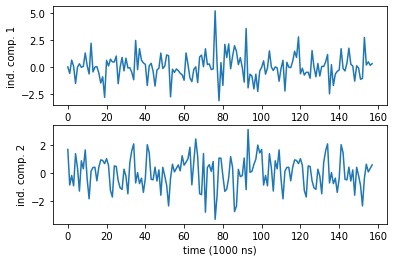

In [7]:
import numpy as np
%pylab inline
subplot2grid((2,1),(0,0))
plot(Y[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y[:,1])
ylabel('ind. comp. 2')
xlabel('time (1000 ns)')
Text(0.5,0,'time (1000 ns)')

In [8]:
print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))

Mean values:  [0.02666805 0.03576515]
Variances:    [1.3778329 1.2731094]


<ipython-input-33-e78cf834e587>:4: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


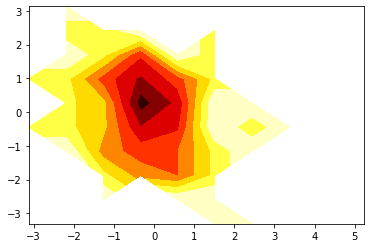

In [33]:
# histogram data
z,x,y = np.histogram2d(Y[:,0],Y[:,1])
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]
contourf(F.T,cmap=plt.cm.hot, extent=extent)

In [34]:
cl = coords.cluster_kmeans(data=Y, k=100, stride=1)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

initialize kmeans++ centers:   0%|                                                             | 0/100 [00:00<…

kmeans iterations:   0%|                                                                        | 0/10 [00:00<…

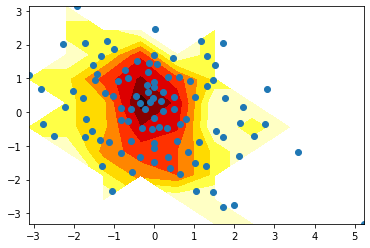

In [37]:
contourf(F.T,cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')

Text(0.5, 0, 'time (10 ns)')

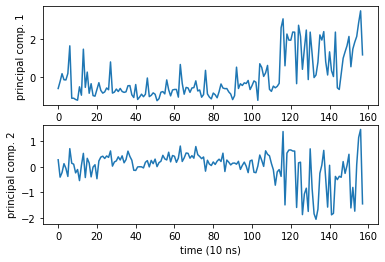

In [12]:
pca_obj = coords.pca(inp, dim=2)
Ypca = pca_obj.get_output()[0]
subplot2grid((2,1),(0,0))
plot(Ypca[:,0])
ylabel('principal comp. 1')
subplot2grid((2,1),(1,0))
plot(Ypca[:,1])
ylabel('principal comp. 2')
xlabel('time (10 ns)')

<ipython-input-36-a9293ded5d32>:4: RuntimeWarning: divide by zero encountered in log
  F_ = -np.log(z_)


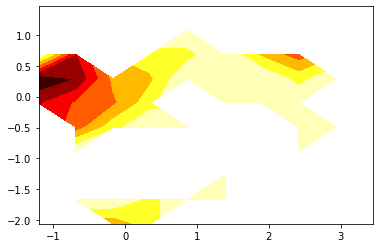

In [36]:
# histogram data
z_,x_,y_ = np.histogram2d(Ypca[:,0],Ypca[:,1])
# compute free energies
F_ = -np.log(z_)
# contour plot
extent_ = [x_[0], x_[-1], y_[0], y_[-1]]
contourf(F_.T,cmap=plt.cm.hot, extent=extent_)

In [38]:
cl = coords.cluster_kmeans(data=Ypca, k=100, stride=1)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

initialize kmeans++ centers:   0%|                                                             | 0/100 [00:00<…

kmeans iterations:   0%|                                                                        | 0/10 [00:00<…

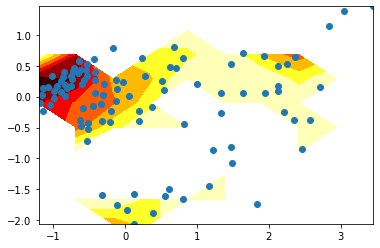

In [39]:
contourf(F_.T, cmap=plt.cm.hot, extent=extent_)
plot(cc_x,cc_y, linewidth=0, marker='o')